In [1]:
import cf_xarray
import gribberish
import xarray as xr

## Reading a Dataset

The `gribberish` engine can be used to read a grib2 file into a dataset.

In [2]:
ds = xr.open_dataset('gfswave.20210826.t12z.atlocn.0p16.f000.grib2', engine='gribberish')
ds

<xarray.Dataset>
Dimensions:    (time: 1, latitude: 331, longitude: 301, seq: 3)
Coordinates:
  * latitude   (latitude) float64 55.0 54.83 54.67 ... 0.3332 0.1666 -0.00011
  * longitude  (longitude) float64 260.0 260.2 260.3 260.5 ... 309.7 309.8 310.0
  * time       (time) datetime64[ns] 2021-08-26T08:00:00
  * seq        (seq) int64 1 2 3
Data variables: (12/13)
    dirpw      (time, latitude, longitude) float64 ...
    vgrd       (time, latitude, longitude) float64 ...
    swell      (time, seq, latitude, longitude) float64 ...
    swper      (time, seq, latitude, longitude) float64 ...
    wvdir      (time, latitude, longitude) float64 ...
    wvhgt      (time, latitude, longitude) float64 ...
    ...         ...
    perpw      (time, latitude, longitude) float64 ...
    wvper      (time, latitude, longitude) float64 ...
    swdir      (time, seq, latitude, longitude) float64 ...
    ugrd       (time, latitude, longitude) float64 ...
    wdir       (time, latitude, longitude) float64 ...
    wind       (time, latitude, longitude) float64 ...
Attributes:
    meta:     created with gribberish

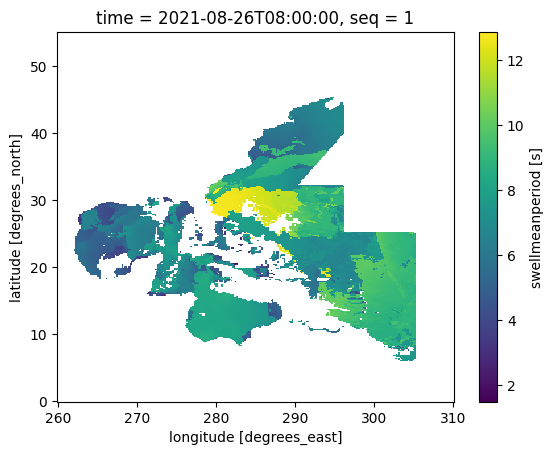

In [5]:
ds.swper.isel(seq=0).plot()